### Week 9: AAI

- Look at sequential models for Neural Nets
- Open AI Gym 
- *keras* or *pytorch* from scratch to make DQN

### Sequential Models for Neural Nets

- RNN
- LSTM
- GRU

In [1]:
import pandas_datareader as pdr

In [2]:
tsla = pdr.get_data_yahoo('TSLA')

In [3]:
tsla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-08,651.280029,618.500000,625.510010,649.880005,64265000.0,649.880005
2020-12-09,654.320007,588.000000,653.690002,604.479980,71291200.0,604.479980
2020-12-10,627.750000,566.340027,574.369995,627.070007,67083200.0,627.070007
2020-12-11,624.000000,596.799988,615.010010,609.989990,46359600.0,609.989990
2020-12-14,642.749878,610.200073,619.000000,639.830017,51113780.0,639.830017


### Classical Model  --> ARIMA

In [13]:
X = tsla[['Adj Close']]['2020':]

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
arima = ARIMA(X, order = (1, 1, 1))

/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jacobkoehler/opt/anaconda3/envs/for_ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [16]:
res = arima.fit()

In [17]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -999.043
Method:                       css-mle   S.D. of innovations             15.545
Date:                Mon, 14 Dec 2020   AIC                           2006.085
Time:                        20:14:38   BIC                           2020.008
Sample:                             1   HQIC                          2011.695
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.3012      0.966      2.382      0.017       0.408       4.195
ar.L1.D.Adj Close    -0.4187      0.589     -0.711      0.477      -1.573       0.736
ma.L1.D.Adj Close     0.3658      0.601      0.609      0.543      -0.812       1.543
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3884           +0.0000j            2.3884            0.5000
MA.1           -2.7337           +0.0000j            2.7337            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
import matplotlib.pyplot as plt

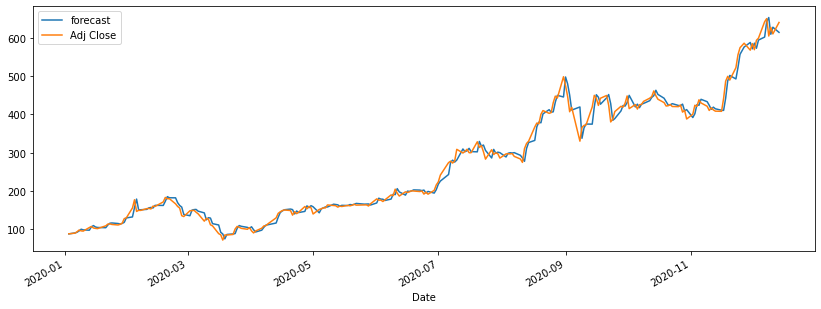

In [19]:
fig, ax = plt.subplots(figsize = (14, 5))
res.plot_predict(ax = ax);

### Do it with an RNN

In [44]:
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, GRU, LSTM, Dense

In [45]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [92]:
X = tsla[['Volume', 'Open']]
y = tsla['Adj Close']

In [110]:
ts = TimeseriesGenerator(X, targets = y, length = 4)

In [111]:
len(ts)

10

In [112]:
vo, ac = ts[0]

In [113]:
vo[:3]

array([[[2.55215000e+07, 4.44199982e+01],
        [1.64930000e+07, 4.67879982e+01],
        [1.50710000e+07, 4.65779991e+01],
        [9.76600000e+06, 4.63380013e+01]],

       [[1.64930000e+07, 4.67879982e+01],
        [1.50710000e+07, 4.65779991e+01],
        [9.76600000e+06, 4.63380013e+01],
        [9.80750000e+06, 4.69980011e+01]],

       [[1.50710000e+07, 4.65779991e+01],
        [9.76600000e+06, 4.63380013e+01],
        [9.80750000e+06, 4.69980011e+01],
        [7.77500000e+06, 4.64360008e+01]]])

In [114]:
ac[:3]

array([45.99000168, 45.93999863, 46.11399841])

In [115]:
vo.shape

(128, 4, 2)

In [106]:
#basic RNN
model = Sequential()
model.add(SimpleRNN(32, input_shape = (4, 2), return_sequences = True))
model.add(SimpleRNN(64, input_shape = (4, 2), return_sequences = True))
model.add(SimpleRNN(32, input_shape = (4, 2)))
model.add(Dense(1, activation = 'linear'))

In [107]:
model.compile(loss = 'mae', metrics = ['mse'])

In [108]:
history = model.fit(ts)

10/10 [==============================] - 0s 8ms/step - loss: 91.9358 - mse: 20262.2305


In [116]:
model = Sequential()
model.add(SimpleRNN(32, input_shape = (4, 2), return_sequences = True))
model.add(SimpleRNN(64, input_shape = (4, 2), return_sequences = True))
model.add(SimpleRNN(32, input_shape = (4, 2)))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mae', metrics = ['mse'])
history = model.fit(ts, epochs = 20)

Epoch 1/20
10/10 [==============================] - 0s 9ms/step - loss: 93.3206 - mse: 20320.0566
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 90.6628 - mse: 19879.5352
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 89.8036 - mse: 19746.3223
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 88.8646 - mse: 19592.9902
Epoch 5/20
10/10 [==============================] - 0s 8ms/step - loss: 88.2669 - mse: 19474.3809
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 87.8725 - mse: 19415.3965
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 87.5148 - mse: 19345.9121
Epoch 8/20
10/10 [==============================] - 0s 8ms/step - loss: 87.1692 - mse: 19282.2715
Epoch 9/20
10/10 [==============================] - 0s 8ms/step - loss: 86.8300 - mse: 19224.8438
Epoch 10/20
10/10 [==============================] - 0s 8ms/step - loss: 86.4932 - mse: 19168.1309
Epoch 11/20
10/10 [

### LSTM and GRU

In [124]:
model = Sequential()
model.add(LSTM(30, input_shape = (4, 2), return_sequences = True))
model.add(LSTM(60, input_shape = (4, 2), return_sequences = True))
model.add(LSTM(32, input_shape = (4, 2)))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mae', metrics = ['mse'])
history = model.fit(ts, epochs = 20)

Epoch 1/20
10/10 [==============================] - 0s 9ms/step - loss: 96.7955 - mse: 21074.8223
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 95.2309 - mse: 20734.6211
Epoch 3/20
10/10 [==============================] - 0s 9ms/step - loss: 93.5312 - mse: 20432.4727
Epoch 4/20
10/10 [==============================] - 0s 9ms/step - loss: 92.4640 - mse: 20257.3613
Epoch 5/20
10/10 [==============================] - 0s 8ms/step - loss: 91.6708 - mse: 20069.4570
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 90.9400 - mse: 19968.7344
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 90.2422 - mse: 19820.9160
Epoch 8/20
10/10 [==============================] - 0s 9ms/step - loss: 89.5369 - mse: 19717.4414
Epoch 9/20
10/10 [==============================] - 0s 9ms/step - loss: 88.8568 - mse: 19598.1426
Epoch 10/20
10/10 [==============================] - 0s 9ms/step - loss: 88.1817 - mse: 19484.9434
Epoch 11/20
10/10 [

In [119]:
model = Sequential()
model.add(GRU(32, input_shape = (4, 2), return_sequences = True))
model.add(GRU(64, input_shape = (4, 2), return_sequences = True))
model.add(GRU(32, input_shape = (4, 2)))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mae', metrics = ['mse'])
history = model.fit(ts, epochs = 20)

Epoch 1/20
10/10 [==============================] - 0s 9ms/step - loss: 94.4481 - mse: 20582.8457
Epoch 2/20
10/10 [==============================] - 0s 9ms/step - loss: 90.7166 - mse: 19877.1172
Epoch 3/20
10/10 [==============================] - 0s 9ms/step - loss: 89.4732 - mse: 19709.0664
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 88.9661 - mse: 19597.4492
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 88.5733 - mse: 19538.4121
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 88.2231 - mse: 19465.0723
Epoch 7/20
10/10 [==============================] - 0s 9ms/step - loss: 87.8740 - mse: 19421.3965
Epoch 8/20
10/10 [==============================] - 0s 9ms/step - loss: 87.5419 - mse: 19343.9688
Epoch 9/20
10/10 [==============================] - 0s 9ms/step - loss: 87.2071 - mse: 19286.9375
Epoch 10/20
10/10 [==============================] - 0s 9ms/step - loss: 86.8747 - mse: 19230.9570
Epoch 11/20
10/10 [

In [121]:
model.predict(ts)

array([[13.762229],
       [13.762229],
       [13.762229],
       ...,
       [13.762229],
       [13.762229],
       [13.762229]], dtype=float32)